In [31]:
%matplotlib inline

from IPython.display import display as d
import pandas as pd
import numpy as np
import seaborn as sns
sns.set(rc={'figure.figsize':(12,12)})
sns.set_style("white")
import glob
import json
import os
import sys
import shutil
from matplotlib import pyplot as plt

In [3]:
df = pd.read_json("likes_views.json")
d(df.head())
df = df[df["real"] == True]

,image_path,likes,views,real
0,pixabay_first50k/images/duck-4934652.jpg,1,83,True
1,pixabay_first50k/images/frog-3386397.jpg,3,251,True
2,pixabay_first50k/images/gulls-84208.jpg,2,589,True
3,pixabay_first50k/images/swan-fight-4066486.jpg,1,292,True
4,pixabay_first50k/images/fragrapanti-4366075.jpg,3,410,True


/home/sgoering/.local/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


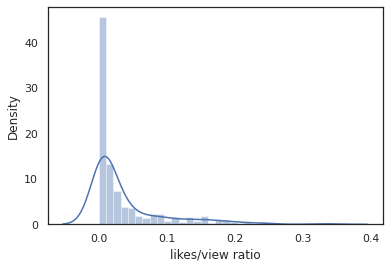

In [64]:
df["ratio"] = df["likes"] / df["views"]


sns.set(rc={'figure.figsize':(6,4)})
sns.set_style("white")
ax = sns.distplot(df["ratio"])
ax.set_xlabel("likes/view ratio")
ax.get_figure().savefig("likes_views_ratio.pdf", bbox_inches="tight")

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


[317.59435246] -5327.521697510168


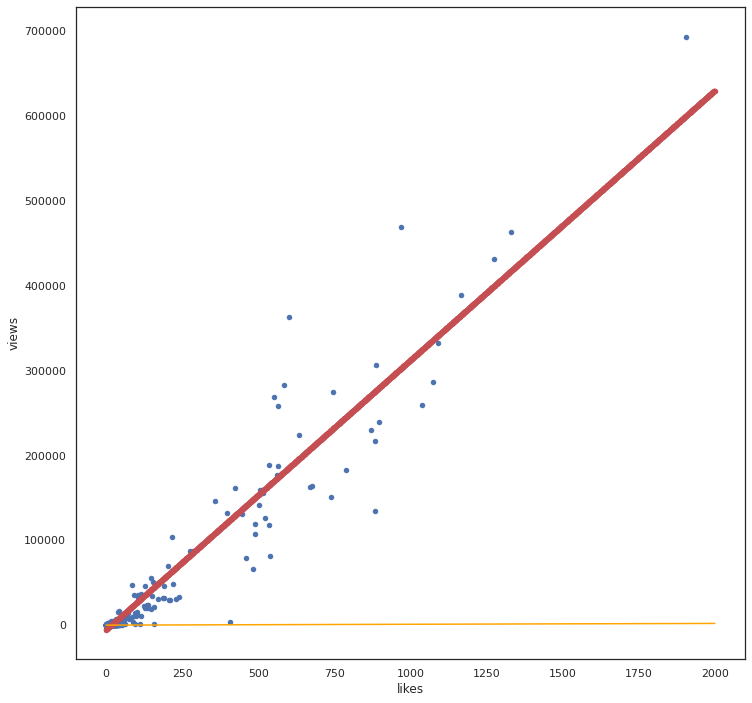

In [58]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression().fit(df["likes"].values.reshape(-1, 1), df["views"])

print(reg.coef_, reg.intercept_)

Xx = []
Yy = []
for i in range(0, 2000):
    y = reg.predict(np.array([[i]]))
    Xx.append(i)
    Yy.append(y)
    
dp = pd.DataFrame({"likes": Xx, "views": Yy})

ax = df.plot(x="likes", y="views", kind="scatter")
ax = dp.plot(x="likes", y="views", c="r", kind="scatter", ax=ax)
ax.plot([0,2000], [0, 2000], c="orange")